<a href="https://colab.research.google.com/github/manyakhare86/oibsip_task4/blob/main/SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading dataset

In [ ]:
dataset = pd.read_csv('Advertising.csv')

In [ ]:
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
dataset.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [ ]:
dataset.drop(dataset.columns[[0]], axis=1,inplace=True)

In [ ]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
dataset.shape

(200, 4)

In [ ]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [ ]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

# Spliting data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Training multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[10.05739563 11.3       ]
 [ 7.4522807   8.4       ]
 [ 7.0197076   8.7       ]
 [24.08029725 25.4       ]
 [12.01786259 11.7       ]
 [ 6.53793858  8.7       ]
 [12.78286918  7.2       ]
 [15.10974587 13.2       ]
 [10.76974013  9.2       ]
 [16.34357951 16.6       ]
 [22.88297477 24.2       ]
 [ 9.12924467 10.6       ]
 [10.46455672 10.5       ]
 [15.48743552 15.6       ]
 [11.58555633 11.8       ]
 [12.17296914 13.2       ]
 [18.76551502 17.4       ]
 [10.78318566  1.6       ]
 [15.90515992 14.7       ]
 [17.30651279 17.        ]
 [24.06692057 26.2       ]
 [ 9.59834224 10.3       ]
 [15.13512211 14.9       ]
 [12.38591525 12.9       ]
 [ 5.71360885  8.1       ]
 [15.24749314 15.2       ]
 [12.29402334 12.6       ]
 [20.9421167  22.6       ]
 [13.40991558 11.6       ]
 [ 9.04348832  8.5       ]
 [12.89239415 12.5       ]
 [21.40272028 23.7       ]
 [18.13802209 16.1       ]
 [21.17320803 21.8       ]
 [ 6.56974433  5.6       ]
 [ 6.14114206  6.7       ]
 [ 7.89018394  9.7       ]
 

In [ ]:
print(regressor.predict([[232.1,8.6,8.7]]))

[15.00851986]


In [ ]:
coefficients = np.polyfit(dataset['TV'], dataset['Sales'], 1)
p = np.poly1d(coefficients)

In [ ]:
coefficients

array([0.04753664, 7.03259355])

In [ ]:
p

poly1d([0.04753664, 7.03259355])

In [ ]:
p(dataset['TV'])

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

# Plots

## Scatter Plot

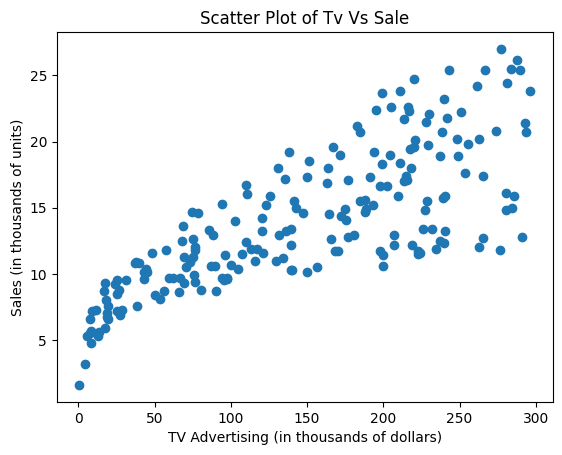

In [ ]:
plt.scatter(dataset['TV'], y)
plt.title('Scatter Plot of Tv Vs Sale')
plt.xlabel('TV Advertising (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.show()


## Line Plot 

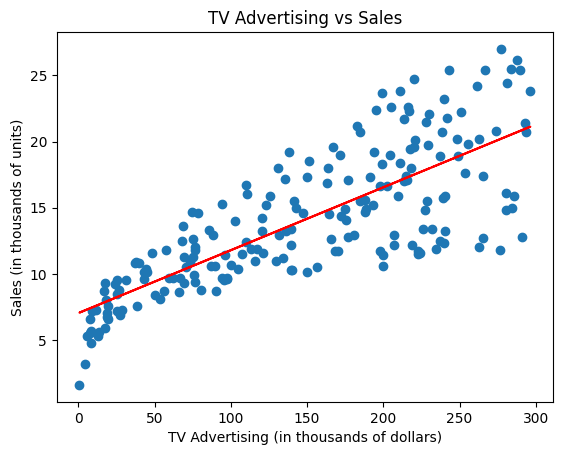

In [ ]:
plt.plot(dataset['TV'], p(dataset['TV']), 'r')
plt.scatter(dataset['TV'], dataset['Sales'])
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.show()

## Distributed Plot

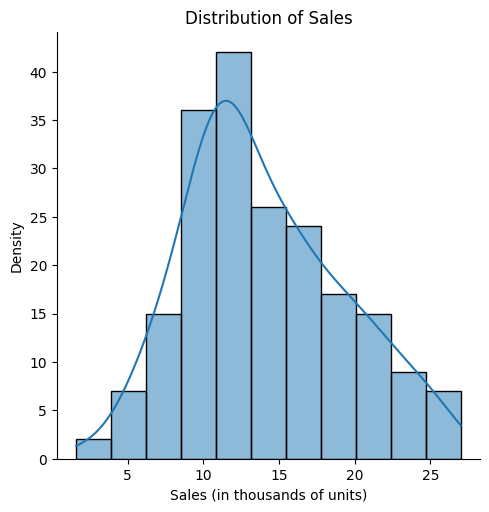

In [ ]:
import seaborn as sns
sns.displot(y, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales (in thousands of units)')
plt.ylabel('Density')
plt.show()

## Box Plot 

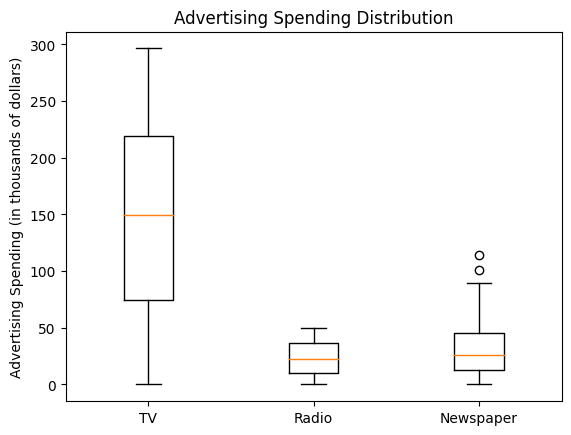

In [ ]:
plt.boxplot([dataset['TV'], dataset['Radio'], dataset['Newspaper']])
plt.title('Advertising Spending Distribution')
plt.xticks([1, 2, 3], ['TV', 'Radio', 'Newspaper'])
plt.ylabel('Advertising Spending (in thousands of dollars)')
plt.show()

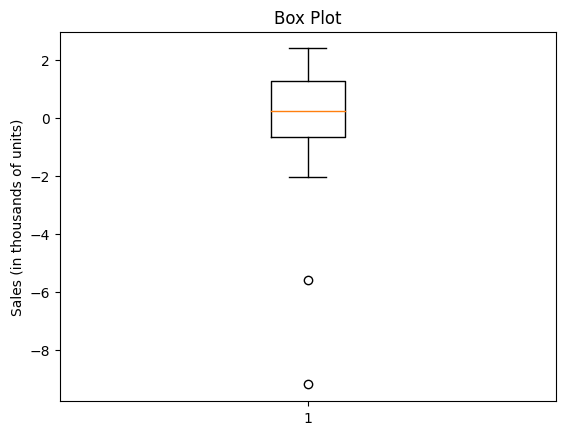

In [ ]:
residual = y_test-y_pred
plt.boxplot(residual)
plt.title('Box Plot')
plt.ylabel('Sales (in thousands of units)')
plt.show()

## Histogram 

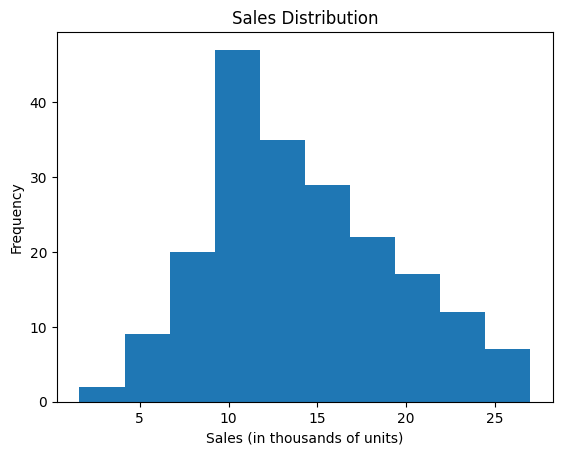

In [ ]:
plt.hist(dataset['Sales'], bins=10)
plt.title('Sales Distribution')
plt.xlabel('Sales (in thousands of units)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)

In [ ]:
accuracy

0.8601145185017868